# Decision Tree and Random Forest Classifier Assignment
Assignment instructions: https://github.com/vesavvo/dkko/blob/main/assignments/Assignment_Decision_trees_and_random_forests.md

## 1. Business Understanding

The goal is to create a classification model using decision trees and random forests to classify whether a website is phishing or legitimate based on various features of the website. The expected outcome is to have a model that can accurately classify websited and help identify phishing websites. The requirements are to use the provided dataset (https://archive.ics.uci.edu/dataset/327/phishing+websites) and to evaluate the performance of the models using appropriate metrics (accuracy, precision, recall, cross-validation). 

## 2. Data Understanding

In this assignment the dataset is loaded using ucimlrepo package. There are 30 features and one target variable. The dataset does not contain any missing values or outliers. The target variable is 'Result' which indicates if the website is phishing (-1) or legitimate (1). The suspicious value (0) is only used in some features and not in the target variable. For more information about the dataset and especially its features, look at the Phishing Websites Features document in the dataset (https://archive.ics.uci.edu/dataset/327/phishing+websites). A document with feature descriptions is availabe when downloading the dataset from the website. 

All needed imports are done in the code cell below. This analysis uses ucimlrepo to load the dataset, matplotlib and scikit-learn for visualization and modeling. Numpy and pandas are used for data manipulation.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframe) 
X = phishing_websites.data.original
X

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


## 3. Data Preparation

In the data there are 11055 rows that represent different websites. The data does not contain any missing values or outliers. All features are categorical (1, 0, -1) so there is no need to scale them. The target variable is 'Result' which indicates whether the website is phishing (-1) or not (1). The features and target variable are separated into X and y variables in the code cell below. The dataset is then split into training and testing sets using a 70-30 split. random_state is set to 123 to ensure reproducibility of the results in future runs.

In [2]:
y = X['result']
X = X.drop(columns=['result'])
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## 4. Modeling

For this assignment both the decision tree and random forest classifiers were used. First the decision tree model was created and evaluated, after that the random forest model was created and evaluated.

### Decision Tree Classifier

The decision tree model was made using scikit-learn's DecisionTreeClassifier. First it was tested without setting the max_depth parameter, which resultet in a horrifyingly large decision tree. After that it was tested with max_depth values from 2 to 10 and those were tested for accuracy. Both the train and test accuracies were recorded and plotted to visualize the results.

Max Depth: 2, Train Accuracy: 0.9081, Test Accuracy: 0.9020
Max Depth: 3, Train Accuracy: 0.9195, Test Accuracy: 0.9117
Max Depth: 4, Train Accuracy: 0.9204, Test Accuracy: 0.9120
Max Depth: 5, Train Accuracy: 0.9247, Test Accuracy: 0.9180
Max Depth: 6, Train Accuracy: 0.9354, Test Accuracy: 0.9201
Max Depth: 7, Train Accuracy: 0.9430, Test Accuracy: 0.9246
Max Depth: 8, Train Accuracy: 0.9495, Test Accuracy: 0.9331
Max Depth: 9, Train Accuracy: 0.9546, Test Accuracy: 0.9346
Max Depth: 10, Train Accuracy: 0.9621, Test Accuracy: 0.9409
Max Depth: 11, Train Accuracy: 0.9677, Test Accuracy: 0.9403
Max Depth: 12, Train Accuracy: 0.9727, Test Accuracy: 0.9430
Max Depth: 13, Train Accuracy: 0.9775, Test Accuracy: 0.9475
Max Depth: 14, Train Accuracy: 0.9820, Test Accuracy: 0.9548
Max Depth: 15, Train Accuracy: 0.9842, Test Accuracy: 0.9548
Max Depth: 16, Train Accuracy: 0.9858, Test Accuracy: 0.9560
Max Depth: 17, Train Accuracy: 0.9875, Test Accuracy: 0.9563
Max Depth: 18, Train Accuracy: 0

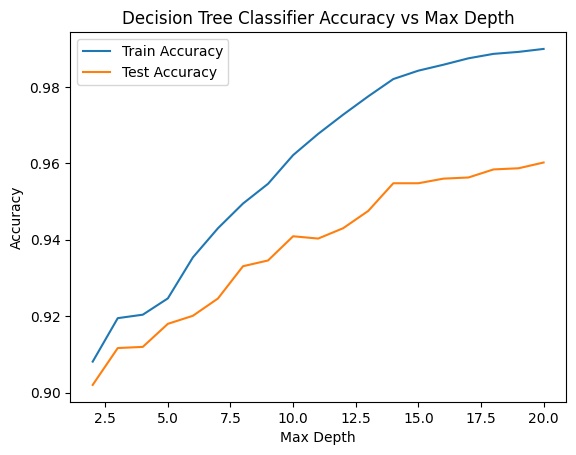

In [3]:
train_acc = []
test_acc = []
for depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print (f"Max Depth: {depth}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

plt.plot(range(2, 21), train_acc, label='Train Accuracy')
plt.plot(range(2, 21), test_acc, label='Test Accuracy') 
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs Max Depth')
plt.legend()
plt.show()

Looking at the results from different max_depth values, the train and test accuracies are closest to each other when max_depth is set to 5. After that train accuracy rises more steeply than test accuracy, which indicates overfitting. The test accuracy flattens at about max_depth at 14, which would be another good choice for max_depth. However, to keep the model simpler and easy to use, the **max_depth is set to 5 where train accuracy is 0.9247 and test Accuracy 0.9180**. More metrics are calculated in the Evaluation section.


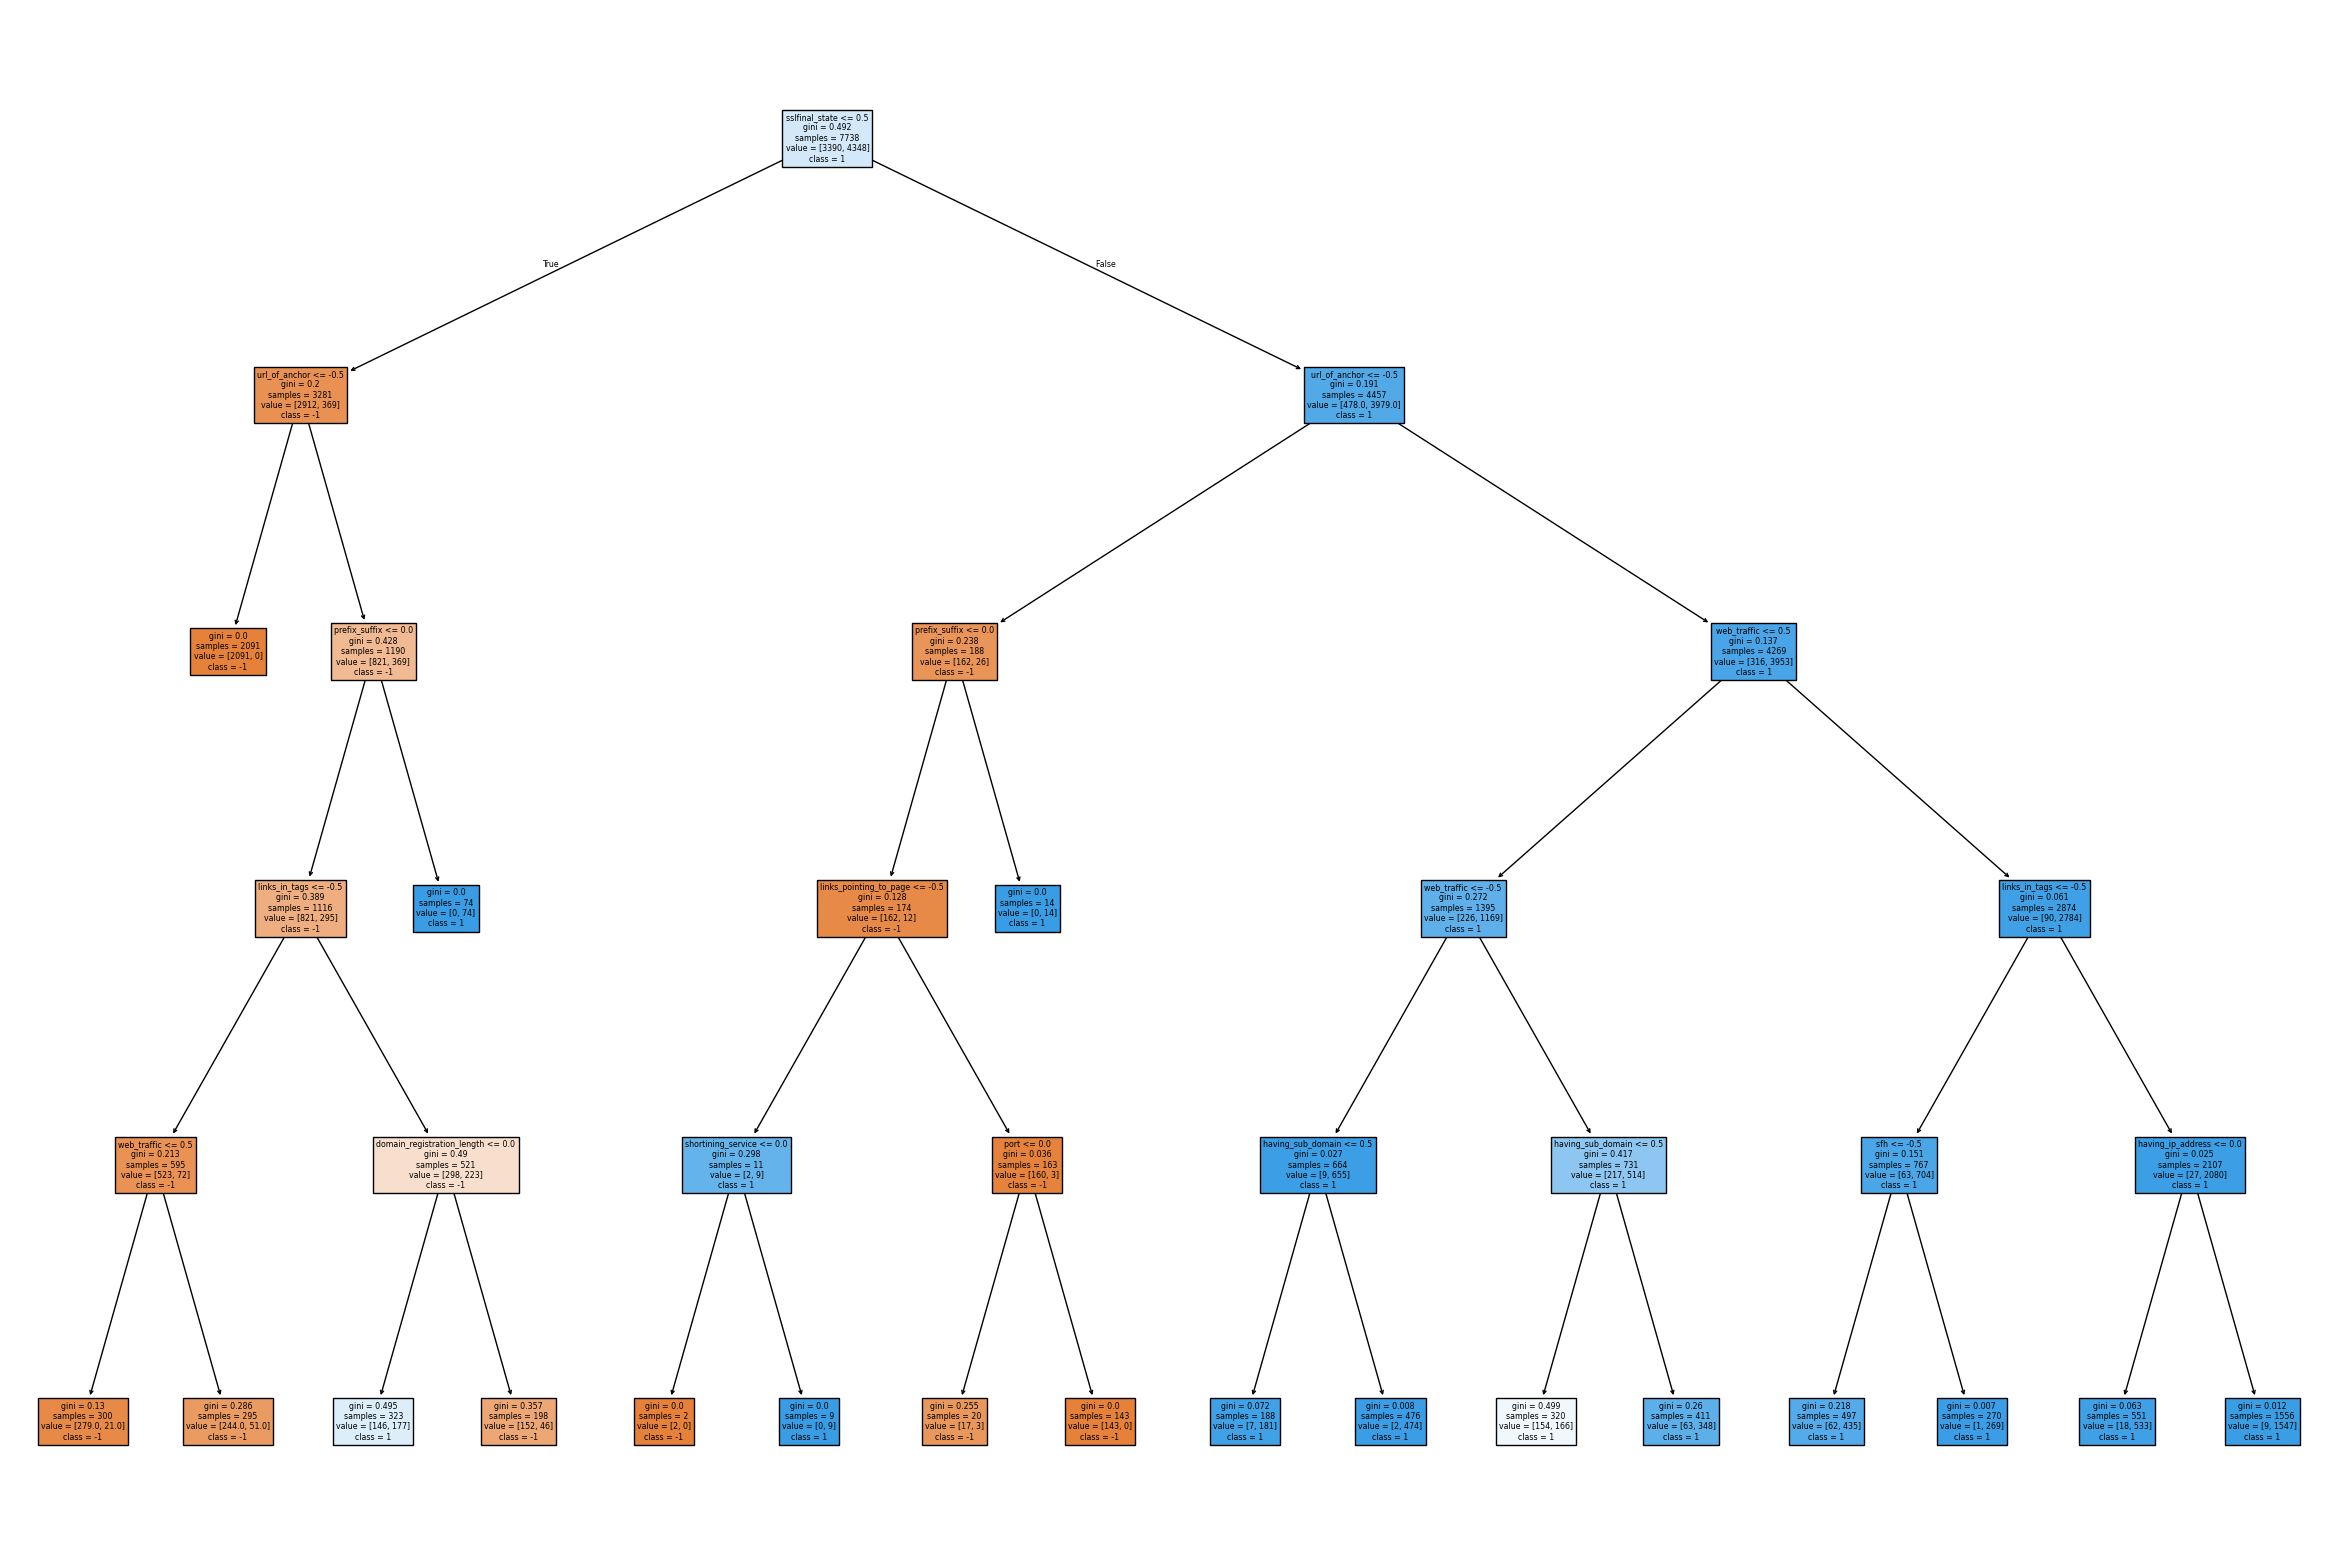

In [4]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=123)
dt_model.fit(X_train, y_train)

fig = plt.figure(figsize=(30,20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['-1', '1'])
plt.show()

Based on the Decison tree, here are written instructions how an internet analyst could use the decision tree to classify a website as phishing or legitimate:
1. Is feature sslfinal_state less than or equal to 0.5?

- If yes, proceed to step a.
- If no, proceed to step 2.

   a. Is url_of_anchor less than or equal to -0.5?

   - If yes, classify the website as **phishing (-1)**.
   - If no: 

   i. Is prefix_suffix less than or equal to 0?

   - If yes, classify the website as **legitimate (1)**.
   - If no:

   ii. Is links_in_tags less than or equal to -0.5?

   - If yes*, classify the website as **phishing (-1)**. 
   - If no:

   iii. Is domain_registeration_length less than or equal to 0.0?

   - If yes, classify the website as **legitimate (1)**.
   - If no, classify the website as **phishing (-1)**.

2. Is url_of_anchor less than or equal to -0.5?

   - If no*, classify the website as **legitimate (1)**.
   - If yes:

   j. Is prefix_suffix less than or equal to 0?

   - If no, classify the website as **legitimate (1)**.
   - If yes:

   jj. Is links_pointing_to_page less than or equal to -0.5?

   - If no*, classify the website as **legitimate (1)**.
   - If yes:

   jjj. Is shortining_service less than or equal to 0.0?

   - If yes, classify the website as **phishing (-1)**.
   - If no, classify the website as **legitimate (1)**.


\* The tree actually splits in these places to more nodes, but since they all result in the same classification, it is combined here for simplicity. If the tree would be changed to have more depth, this node could be further split to give more accurate results and the instructions would need to be updated accordingly.


### Random Forest Classifier

The random forest model was made using scikit-learn's RandomForestClassifier. The random forest model should perform better than the decision tree model as it combines multiple decision trees to make a prediction. This helps to reduce overfitting and improve generalization. The random forest model was tested first with 100 estimators (trees) and a max_depth of 5 to match the decision tree model, but that resultet in lower accuracy. In the below code cells are tested what values for max_features, max_samples and n_estimators would give the best cross-validated accuracy.  

In [5]:

for max_features in np.arange(0.3, 1.01, 0.1):
    max_features = round(max_features, 1)
    rf_model = RandomForestClassifier(n_estimators=100, max_samples=0.7, max_features=max_features, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with max_features={max_features}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with max_features=0.3: 0.9661
Random Forest Classifier cross val score with max_features=0.4: 0.9646
Random Forest Classifier cross val score with max_features=0.5: 0.9658
Random Forest Classifier cross val score with max_features=0.6: 0.9655
Random Forest Classifier cross val score with max_features=0.7: 0.9641
Random Forest Classifier cross val score with max_features=0.8: 0.9643
Random Forest Classifier cross val score with max_features=0.9: 0.9637
Random Forest Classifier cross val score with max_features=1.0: 0.9641


In [6]:
for max_samples in np.arange(0.3, 1.01, 0.1):
    max_samples = round(max_samples, 1)
    rf_model = RandomForestClassifier(n_estimators=100, max_samples=max_samples, max_features=0.3, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with max_samples={max_samples}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with max_samples=0.3: 0.9625
Random Forest Classifier cross val score with max_samples=0.4: 0.9652
Random Forest Classifier cross val score with max_samples=0.5: 0.9650
Random Forest Classifier cross val score with max_samples=0.6: 0.9664
Random Forest Classifier cross val score with max_samples=0.7: 0.9661
Random Forest Classifier cross val score with max_samples=0.8: 0.9660
Random Forest Classifier cross val score with max_samples=0.9: 0.9661
Random Forest Classifier cross val score with max_samples=1.0: 0.9658


In [7]:
for n_estimators in range(50, 301, 50):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_samples=0.6, max_features=0.3, random_state=123)
    rf_model.fit(X_train, y_train)
    cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Random Forest Classifier cross val score with n_estimators={n_estimators}: {cross_val_score(rf_model, X_train, y_train, cv=5).mean():.4f}")

Random Forest Classifier cross val score with n_estimators=50: 0.9664
Random Forest Classifier cross val score with n_estimators=100: 0.9664
Random Forest Classifier cross val score with n_estimators=150: 0.9670
Random Forest Classifier cross val score with n_estimators=200: 0.9665
Random Forest Classifier cross val score with n_estimators=250: 0.9669
Random Forest Classifier cross val score with n_estimators=300: 0.9663


Based on the results a random forest model with 150 estimators, 30% max_features and 60% max_samples was decided as the final model. 

In [8]:
rf_model = RandomForestClassifier(n_estimators=150, max_samples=0.6, max_features=0.3, random_state=123)
rf_model.fit(X_train, y_train)
cross_val_score = cross_val_score(rf_model, X_train, y_train, cv=5).mean()
print(f"Final Random Forest Classifier cross val score: {cross_val_score:.4f}")

Final Random Forest Classifier cross val score: 0.9670


## 5. Evaluation

Both the Decision Tree and Random Forest classifier metrics are shown below. Let´s first look at the Decision Tree results. The models have been optimized in the Modeling section using accuracy and cross-validation accuracy. Next we will look at more metrics to evaluate the models further. 

### Decision Tree Classifier
Below are the results for the Decision Tree Classifier.

Decision Tree Classifier Results:
              precision    recall  f1-score   support

          -1       0.96      0.85      0.90      1508
           1       0.89      0.97      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.91      0.92      3317
weighted avg       0.92      0.92      0.92      3317



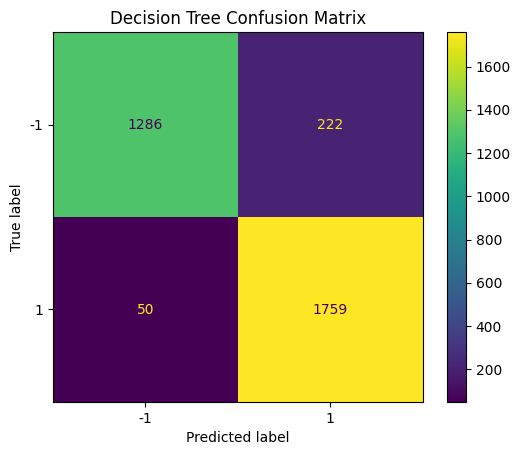

In [9]:
y_pred_tree = dt_model.predict(X_test)
print('Decision Tree Classifier Results:')
print(classification_report(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree)
cmd = ConfusionMatrixDisplay(cm, display_labels=['-1', '1'])
cmd.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


The precision for phishing websites (-1) is 0.96 and recall 0.85. The precision for legitate websites (1) is 0.89 an recall 0.97. Accuracy for the model is 0.92.These values indicate that there are still some false positives and false negatives and these might be reduced by tuning the model further by for examply using a bigger value for max_depth or using RandomForestClassifier as done here.

### Random Forest Classifier
Below are the results for the Random Forest Classifier.

Random Forest Classifier Results:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1508
           1       0.96      0.98      0.97      1809

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



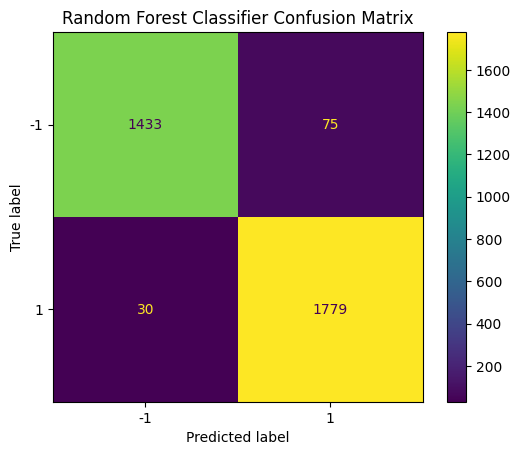

In [10]:
y_pred_forest = rf_model.predict(X_test)
print('Random Forest Classifier Results:')
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest, labels=rf_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)
cmd.plot()
plt.title('Random Forest Classifier Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The precision for phishing websites (-1) is 0.98 and recall 0.95. The precision for legitimate websited (1) is 0.96 and recall 0.98. Accuracy for the model is 0.97. The random forest classifier performs better than the decision tree classifier as expected, reducing both false positives and false negatives. This model is recommended for use in classifying websites as phishing or legitimate. It meets the business requirements better than the decision tree model.

## 6. Deployment

The random forest model has better performance and can be deployed as a software where for example an internet analyst can input the features of a website and get a prediction of whether the website is phishing or legitimate. The decision tree model may be used as suggested in the written instructions in the Modeling section if a simple and quick classification is needed. There it should be noted that the decision tree model has lower accuracy and may result in more false positives and false negatives compared to the random forest model.
